In [32]:
import os

import numpy as np
import pandas as pd

### Add Previous Year Applicants

In [33]:
# Load the dataset, which is output of "Target Variable Prep" notebook and manual mapping of clean names.
data = pd.read_csv("../merged_seekers_iso_pop_gdelt_v4.csv",encoding="utf-8")
print("Dataframe initial shape: ",data.shape)

# Drop duplicate rows based on year, origin, applicant count
data = data.drop_duplicates(subset=['Year','Origin_x','Applied during year_x'])
print("Dataframe de-duplicated shape: ",data.shape)

# Create the column we will fill
data['applied_next_year'] = np.ones(len(data),dtype='int64')*-100

#Remove 'applied_previous_year'
try:
    data = data.drop('applied_previous_year',axis=1)
except:
    print("applied_previous_year column already removed.")

Dataframe initial shape:  (5228, 122)
Dataframe de-duplicated shape:  (3863, 122)
applied_previous_year column already removed.


In [34]:
# Extract country names and years, for indexing 
countries = data['Origin_x'].unique()
years = data['Year'].unique()

In [35]:
len(pd.Series(countries).unique())

224

In [36]:
missing_next_year=0
missing_curr_year = 0
missing_curr_year_population = 0
completed_points = 0
missing_next_year_indices =[]
# This double for loop finds the next year's applicants for each country in each year 2000-2017
# It then adds that value to 'applied_next_year' column.  If data for the next year isn't available...??

for year in years[:-2]: # Leave out last year to calculate previous year
    for country in countries:
        try:
            # We don't have data points for every country every year, but the for loop doesn't account for that
            # It tries every year-country combination.  So this outer try-except-else skips the whole process if
            # The current year doesn't exist, but counts how often that happens.
            current_year_index = data.index[(data.Year==year) & (data.Origin_x==country)].item()

        except ValueError:
            missing_curr_year +=1
            
        else:
            try:
                # If the current year exists, the inner try-except-else finds cases where the next year does
                # not exist, and tracks how often that value is missing.
                next_year_index = data.index[(data.Year==(year+1)) & (data.Origin_x==country)].item()
                
            except ValueError:
                missing_next_year+=1
                missing_next_year_indices.append(current_year_index)
            
            else:        
                next_year = data.loc[next_year_index,'Applied during year_x']
                data.loc[current_year_index,'applied_next_year'] = next_year
                completed_points +=1

# Print out the missing values
print("Total data points: {}".format(len(data[data.Year<2018])))
print("Total completed data points: {}".format(completed_points))
print("Missing next year count: {}".format(missing_next_year))
print("Missing current year count: {}".format(missing_curr_year))
print("Dataframe ending shape: ",data.shape)

Total data points: 3661
Total completed data points: 3557
Missing next year count: 86
Missing current year count: 389
Dataframe ending shape:  (3863, 123)


In [37]:
# Remove years where next year data is missing, and where this year's Origin is missing 
# Remove rows where this year's Origin is missing (none of these matched to next year applicant counts)
clean_data = data.drop(missing_next_year_indices,axis=0)
clean_data = clean_data.dropna(subset=['Origin_x'])

In [47]:
 (224*18)

4032

In [7]:
# Create csv file
clean_data.to_csv("Asylum_seekers_per_country_per_year_w_next_year_12_3.csv",index=False)

In [8]:
clean_data.loc[clean_data.Origin_x == 'Afghanistan']

,Unnamed: 0,Year,Origin_x,Applied during year_x,year_origin_x,English_short_name_x,French_short_name_x,Alpha_2_code_x,Alpha_3_code_x,Numeric_x,...,Quad_4_Goldstein_Neg_5,Quad_4_Goldstein_Neg_6,Quad_4_Goldstein_Neg_7,Quad_4_Goldstein_Neg_8,Quad_4_Goldstein_Neg_9,Event_Code_19_20,Extreme_Pos_Tone_Events,Extreme_Neg_Tone_Events,gdelt_merge,applied_next_year
0,0,2000.0,Afghanistan,291283.0,"(2000, 'Afghanistan')",Afghanistan,Afghanistan (l'),AF,AFG,4.0,...,3726.0,3719.0,3691.0,3296.0,3133.0,3003.0,371.0,0.0,both,66697.0
1,1,2001.0,Afghanistan,66697.0,"(2001, 'Afghanistan')",Afghanistan,Afghanistan (l'),AF,AFG,4.0,...,18742.0,18687.0,18527.0,16901.0,15864.0,14931.0,2593.0,0.0,both,31781.0
2,2,2002.0,Afghanistan,31781.0,"(2002, 'Afghanistan')",Afghanistan,Afghanistan (l'),AF,AFG,4.0,...,12683.0,12661.0,12554.0,11603.0,10986.0,9900.0,3200.0,0.0,both,22856.0
3,3,2003.0,Afghanistan,22856.0,"(2003, 'Afghanistan')",Afghanistan,Afghanistan (l'),AF,AFG,4.0,...,16702.0,16675.0,16597.0,15743.0,14680.0,13557.0,3079.0,0.0,both,14893.0
4,4,2004.0,Afghanistan,14893.0,"(2004, 'Afghanistan')",Afghanistan,Afghanistan (l'),AF,AFG,4.0,...,13759.0,13740.0,13663.0,12764.0,11425.0,10330.0,2763.0,0.0,both,12898.0
5,5,2005.0,Afghanistan,12898.0,"(2005, 'Afghanistan')",Afghanistan,Afghanistan (l'),AF,AFG,4.0,...,11954.0,11934.0,11882.0,11268.0,9983.0,8815.0,1256.0,12.0,both,15445.0
6,6,2006.0,Afghanistan,15445.0,"(2006, 'Afghanistan')",Afghanistan,Afghanistan (l'),AF,AFG,4.0,...,35007.0,34987.0,34863.0,33259.0,30617.0,27298.0,1494.0,0.0,both,18520.0
7,7,2007.0,Afghanistan,18520.0,"(2007, 'Afghanistan')",Afghanistan,Afghanistan (l'),AF,AFG,4.0,...,64977.0,64900.0,64584.0,62243.0,54938.0,48897.0,2637.0,3.0,both,30349.0
8,8,2008.0,Afghanistan,30349.0,"(2008, 'Afghanistan')",Afghanistan,Afghanistan (l'),AF,AFG,4.0,...,70873.0,70799.0,70474.0,66997.0,60549.0,54550.0,3076.0,1.0,both,42529.0
9,9,2009.0,Afghanistan,42529.0,"(2009, 'Afghanistan')",Afghanistan,Afghanistan (l'),AF,AFG,4.0,...,111078.0,110985.0,110507.0,101857.0,94157.0,84768.0,8369.0,0.0,both,40174.0


Text(0.5, 1.0, 'Global Applicants per Year')

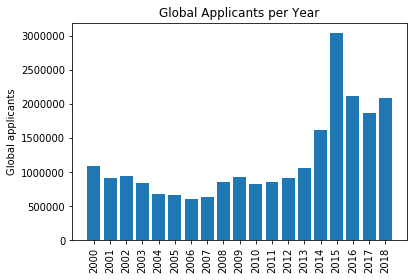

In [31]:
import matplotlib.pyplot as plt
year_tots = clean_data.groupby(['Year'])['Applied during year_x'].sum()
plt.bar(np.arange(2000,2019),year_tots)
plt.xticks(np.arange(2000,2019),np.arange(2000,2019),rotation=90)
plt.ylabel("Global applicants")
plt.title("Global Applicants per Year")

In [28]:
len(np.arange(2000,2018))

18

In [27]:
len(year_tots)

19